In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA# ar and ima
from statsmodels.tsa.stattools import adfuller#time series is stationary or not

In [4]:
deliveries=pd.read_csv("deliveries.csv")
deliveries.head()    

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [5]:
deliveries.batter.unique()

array(['SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey',
       'Mohammad Hafeez', 'R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis',
       'CL White', 'MV Boucher', 'B Akhil', 'AA Noffke', 'P Kumar',
       'Z Khan', 'SB Joshi', 'PA Patel', 'ML Hayden', 'MEK Hussey',
       'MS Dhoni', 'SK Raina', 'JDP Oram', 'S Badrinath', 'K Goel',
       'JR Hopes', 'KC Sangakkara', 'Yuvraj Singh', 'SM Katich',
       'IK Pathan', 'T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif',
       'DS Lehmann', 'RA Jadeja', 'M Rawat', 'D Salunkhe', 'SK Warne',
       'SK Trivedi', 'G Gambhir', 'V Sehwag', 'S Dhawan', 'L Ronchi',
       'ST Jayasuriya', 'DJ Thornely', 'RV Uthappa', 'PR Shah',
       'AM Nayar', 'SM Pollock', 'Harbhajan Singh', 'S Chanderpaul',
       'LRPL Taylor', 'AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxman',
       'A Symonds', 'RG Sharma', 'SB Styris', 'AS Yadav', 'SB Bangar',
       'WPUJC Vaas', 'RP Singh', 'WP Saha', 'LR Shukla',
       'DPMD Jayawardene', 'S Sohal', 'B Lee', 'PP Cha

In [6]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [7]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [8]:
vkohli=deliveries[deliveries.batter=="V Kohli"]
vkohli_score=vkohli.groupby('match_id')['batsman_runs'].sum().reset_index()
vkohli_score_sub=vkohli_score.head(239)
vkohli_score_sub

,match_id,batsman_runs
0,335982,1
1,335985,23
2,335992,13
3,335996,12
4,335998,1
...,...,...
234,1426263,3
235,1426268,42
236,1426274,18
237,1426279,51


In [9]:
#preparing data
vkohli_score_sub["match_number"]=range(len(vkohli_score_sub))
vkohli_score_sub.set_index("match_number",inplace=True)
model=ARIMA(vkohli_score_sub["batsman_runs"],order=(1,1,1))
model_fit=model.fit()
forecast=model_fit.forecast(steps=5)
print(forecast)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13408\2652151109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vkohli_score_sub["match_number"]=range(len(vkohli_score_sub))


239    45.064196
240    44.510021
241    44.497705
242    44.497431
243    44.497425
Name: predicted_mean, dtype: float64


In [10]:
batter=deliveries.groupby(['match_id','batter']).agg({'batsman_runs':'sum'}).reset_index()
batter_scores=batter.groupby('batter')['batsman_runs'].sum().reset_index()
batter_scores=batter_scores.sort_values(by="batsman_runs",ascending=False)
top_batter_scores=batter_scores.head(10)
print(top_batter_scores)
for i in range(len(top_batter_scores)):
  batsman=top_batter_scores.iloc[i]["batter"]
  print(batsman)
  score=batter[batter['batter']==batsman]
  print(score)


             batter  batsman_runs
631         V Kohli          8014
512        S Dhawan          6769
477       RG Sharma          6630
147       DA Warner          6567
546        SK Raina          5536
374        MS Dhoni          5243
30   AB de Villiers          5181
124        CH Gayle          4997
501      RV Uthappa          4954
282      KD Karthik          4843
V Kohli
       match_id   batter  batsman_runs
13       335982  V Kohli             1
56       335985  V Kohli            23
168      335992  V Kohli            13
224      335996  V Kohli            12
252      335998  V Kohli             1
...         ...      ...           ...
16197   1426290  V Kohli            42
16300   1426296  V Kohli            92
16367   1426300  V Kohli            27
16434   1426306  V Kohli            47
16479   1426310  V Kohli            33

[244 rows x 3 columns]
S Dhawan
       match_id    batter  batsman_runs
35       335984  S Dhawan            52
96       335988  S Dhawan            

Text(0, 0.5, 'scores')

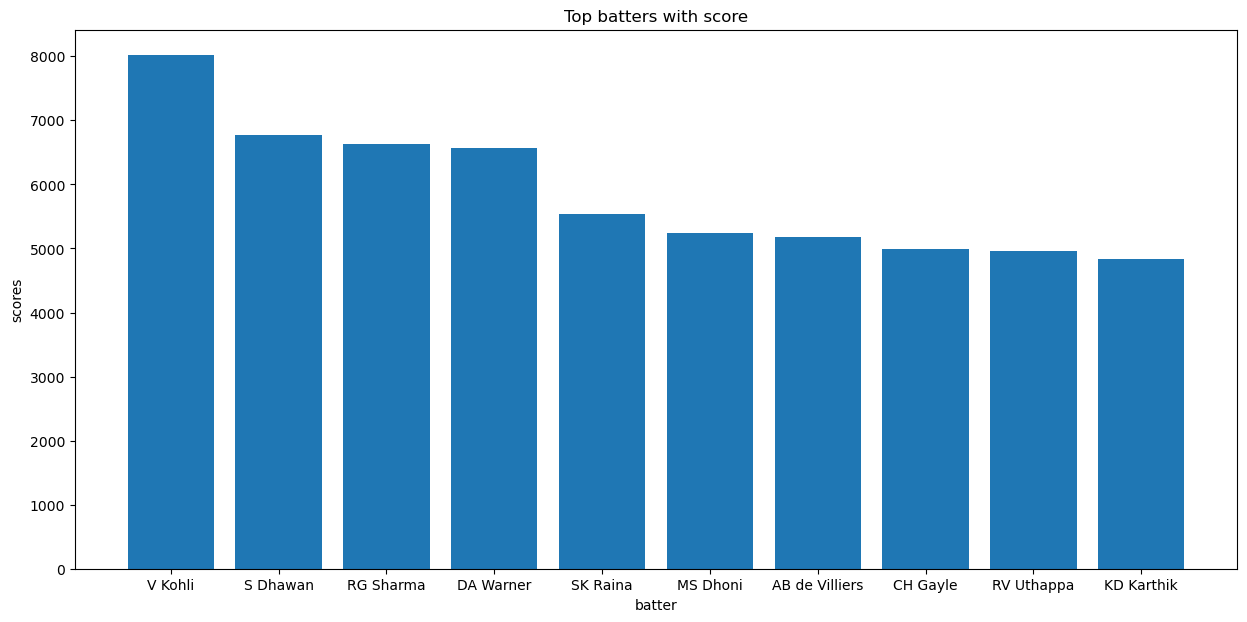

In [11]:
player=top_batter_scores['batter']
scores=top_batter_scores['batsman_runs']
fig = plt.figure(figsize = (15,7))
plt.bar(player,scores)
plt.title('Top batters with score')
plt.xlabel('batter')
plt.ylabel('scores')

ARIMA MODEL FOR TOP 10 BATTER

In [12]:
for i in range(len(top_batter_scores)):
  batsman=top_batter_scores.iloc[i]["batter"]
  print(batsman)
  score=batter[batter['batter']==batsman]
  #preparing data
  top_batter_score=score.head(239)
  top_batter_score["match_number"]=range(len(top_batter_score))
  top_batter_score.set_index("match_number",inplace=True)
  model=ARIMA(top_batter_score["batsman_runs"],order=(1,1,1))
  model_fit=model.fit()
  forecast=model_fit.forecast(steps=5)
  print(forecast)
     

V Kohli


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13408\1642410643.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_batter_score["match_number"]=range(len(top_batter_score))


239    45.064196
240    44.510021
241    44.497705
242    44.497431
243    44.497425
Name: predicted_mean, dtype: float64
S Dhawan


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13408\1642410643.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_batter_score["match_number"]=range(len(top_batter_score))


221    34.077027
222    32.753424
223    32.840684
224    32.834931
225    32.835310
Name: predicted_mean, dtype: float64
RG Sharma


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13408\1642410643.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_batter_score["match_number"]=range(len(top_batter_score))


239    26.263768
240    26.226524
241    26.231783
242    26.231040
243    26.231145
Name: predicted_mean, dtype: float64
DA Warner


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13408\1642410643.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_batter_score["match_number"]=range(len(top_batter_score))


184    30.375157
185    29.294774
186    29.334510
187    29.333048
188    29.333102
Name: predicted_mean, dtype: float64
SK Raina


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13408\1642410643.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_batter_score["match_number"]=range(len(top_batter_score))


200    26.396030
201    25.281171
202    25.413451
203    25.397756
204    25.399618
Name: predicted_mean, dtype: float64
MS Dhoni


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13408\1642410643.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_batter_score["match_number"]=range(len(top_batter_score))


228    14.177092
229    14.334177
230    14.331897
231    14.331930
232    14.331929
Name: predicted_mean, dtype: float64
AB de Villiers


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13408\1642410643.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_batter_score["match_number"]=range(len(top_batter_score))


170    32.171063
171    30.361837
172    30.516449
173    30.503237
174    30.504366
Name: predicted_mean, dtype: float64
CH Gayle


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13408\1642410643.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_batter_score["match_number"]=range(len(top_batter_score))


141    31.122217
142    29.325195
143    29.513797
144    29.494003
145    29.496080
Name: predicted_mean, dtype: float64
RV Uthappa
197    21.230933
198    21.476908
199    21.479899
200    21.479935
201    21.479936
Name: predicted_mean, dtype: float64
KD Karthik


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13408\1642410643.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_batter_score["match_number"]=range(len(top_batter_score))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13408\1642410643.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_batter_score["match_number"]=range(len(top_batter_score))


233    20.803248
234    20.558830
235    20.564924
236    20.564772
237    20.564776
Name: predicted_mean, dtype: float64


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

for i in range(len(top_batter_scores)):
    batsman = top_batter_scores.iloc[i]["batter"]
    print(f"Batsman: {batsman}")
    score = batter[batter['batter'] == batsman]

    # Preparing data
    score["match_number"] = range(len(score))
    score.set_index("match_number", inplace=True)

    # Splitting into train and test sets
    train_size = int(len(score) * 0.8)  # 80% train, 20% test
    train, test = score["batsman_runs"][:train_size], score["batsman_runs"][train_size:]

    # Fitting the ARIMA model
    model = ARIMA(train, order=(1, 1, 1))
    model_fit = model.fit()

    # Forecasting for test set
    test_forecast = model_fit.forecast(steps=len(test))

    # Forecasting beyond the dataset
    future_forecast = model_fit.forecast(steps=5)

    # Evaluation metrics
    mae = mean_absolute_error(test, test_forecast)
    mse = mean_squared_error(test, test_forecast)
    rmse = np.sqrt(mse)

    # Display results
    print("Future Forecasted Values (Next 5 Matches):")
    print(future_forecast)
    print("Evaluation Metrics:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print("-" * 50)

Batsman: V Kohli


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13408\2967835382.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score["match_number"] = range(len(score))


Future Forecasted Values (Next 5 Matches):
195    24.903255
196    26.494555
197    26.615696
198    26.624918
199    26.625620
Name: predicted_mean, dtype: float64
Evaluation Metrics:
Mean Absolute Error (MAE): 25.49
Mean Squared Error (MSE): 1049.98
Root Mean Squared Error (RMSE): 32.40
--------------------------------------------------
Batsman: S Dhawan
Future Forecasted Values (Next 5 Matches):
176    31.254979
177    35.307288
178    35.001749
179    35.024786
180    35.023049
Name: predicted_mean, dtype: float64
Evaluation Metrics:
Mean Absolute Error (MAE): 21.69
Mean Squared Error (MSE): 701.30
Root Mean Squared Error (RMSE): 26.48
--------------------------------------------------
Batsman: RG Sharma


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13408\2967835382.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score["match_number"] = range(len(score))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13408\2967835382.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score["match_number"] = range(len(score))


Future Forecasted Values (Next 5 Matches):
200    29.323258
201    26.941564
202    27.311751
203    27.254213
204    27.263156
Name: predicted_mean, dtype: float64
Evaluation Metrics:
Mean Absolute Error (MAE): 18.25
Mean Squared Error (MSE): 491.34
Root Mean Squared Error (RMSE): 22.17
--------------------------------------------------
Batsman: DA Warner
Future Forecasted Values (Next 5 Matches):
147    38.036425
148    35.877704
149    36.032852
150    36.021701
151    36.022502
Name: predicted_mean, dtype: float64
Evaluation Metrics:
Mean Absolute Error (MAE): 24.24
Mean Squared Error (MSE): 731.35
Root Mean Squared Error (RMSE): 27.04
--------------------------------------------------
Batsman: SK Raina


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13408\2967835382.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score["match_number"] = range(len(score))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13408\2967835382.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score["match_number"] = range(len(score))


Future Forecasted Values (Next 5 Matches):
160    26.853964
161    29.031454
162    28.783806
163    28.811972
164    28.808768
Name: predicted_mean, dtype: float64
Evaluation Metrics:
Mean Absolute Error (MAE): 18.69
Mean Squared Error (MSE): 447.25
Root Mean Squared Error (RMSE): 21.15
--------------------------------------------------
Batsman: MS Dhoni


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13408\2967835382.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score["match_number"] = range(len(score))


Future Forecasted Values (Next 5 Matches):
182    25.523234
183    25.450887
184    25.451689
185    25.451680
186    25.451680
Name: predicted_mean, dtype: float64
Evaluation Metrics:
Mean Absolute Error (MAE): 14.75
Mean Squared Error (MSE): 288.11
Root Mean Squared Error (RMSE): 16.97
--------------------------------------------------
Batsman: AB de Villiers


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13408\2967835382.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score["match_number"] = range(len(score))


Future Forecasted Values (Next 5 Matches):
136    32.328824
137    35.492500
138    35.117232
139    35.161745
140    35.156465
Name: predicted_mean, dtype: float64
Evaluation Metrics:
Mean Absolute Error (MAE): 24.24
Mean Squared Error (MSE): 723.09
Root Mean Squared Error (RMSE): 26.89
--------------------------------------------------
Batsman: CH Gayle
Future Forecasted Values (Next 5 Matches):
112    22.419313
113    31.696701
114    30.175512
115    30.424938
116    30.384040
Name: predicted_mean, dtype: float64
Evaluation Metrics:
Mean Absolute Error (MAE): 19.73
Mean Squared Error (MSE): 661.30
Root Mean Squared Error (RMSE): 25.72
--------------------------------------------------
Batsman: RV Uthappa


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13408\2967835382.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score["match_number"] = range(len(score))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13408\2967835382.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score["match_number"] = range(len(score))


Future Forecasted Values (Next 5 Matches):
157    27.401154
158    26.963615
159    26.952737
160    26.952467
161    26.952460
Name: predicted_mean, dtype: float64
Evaluation Metrics:
Mean Absolute Error (MAE): 17.15
Mean Squared Error (MSE): 440.21
Root Mean Squared Error (RMSE): 20.98
--------------------------------------------------
Batsman: KD Karthik


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13408\2967835382.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score["match_number"] = range(len(score))


Future Forecasted Values (Next 5 Matches):
186    22.305427
187    21.422765
188    21.491678
189    21.486298
190    21.486718
Name: predicted_mean, dtype: float64
Evaluation Metrics:
Mean Absolute Error (MAE): 14.28
Mean Squared Error (MSE): 322.30
Root Mean Squared Error (RMSE): 17.95
--------------------------------------------------


In [14]:
#preparing data
dhoni=deliveries[deliveries.batter=="MS Dhoni"]
dhoni_score=dhoni.groupby('match_id')['batsman_runs'].sum().reset_index()
print(dhoni_score)
dhoni_score_sub=dhoni_score.head(239)
dhoni_score_sub
dhoni_score_sub["match_number"]=range(len(dhoni_score_sub))
dhoni_score_sub.set_index("match_number",inplace=True)
model=ARIMA(vkohli_score_sub["batsman_runs"],order=(1,1,1))
model_fit=model.fit()
forecast=model_fit.forecast(steps=5)
print(forecast)

     match_id  batsman_runs
0      335983             2
1      335989            30
2      335993            43
3      335996            65
4      336001            32
..        ...           ...
223   1426284             5
224   1426287            14
225   1426291             0
226   1426297            26
227   1426306            25

[228 rows x 2 columns]


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13408\4149516577.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dhoni_score_sub["match_number"]=range(len(dhoni_score_sub))


239    45.064196
240    44.510021
241    44.497705
242    44.497431
243    44.497425
Name: predicted_mean, dtype: float64


In [15]:
bowler_data = deliveries[['match_id', 'bowler', 'is_wicket', 'total_runs']]
performance = bowler_data.groupby(['match_id', 'bowler']).agg(
    wickets=('is_wicket', 'sum'),
    runs_conceded=('total_runs', 'sum')
).reset_index()

print(performance)

top_bowler = 'YS Chahal'
bowler_timeseries = performance[performance['bowler'] == top_bowler].set_index('match_id')['wickets']
print(bowler_timeseries)

bowler_timeseries = bowler_timeseries.sort_index()

       match_id         bowler  wickets  runs_conceded
0        335982      AA Noffke        1             41
1        335982     AB Agarkar        3             25
2        335982       AB Dinda        2              9
3        335982       CL White        0             24
4        335982       I Sharma        1             13
...         ...            ...      ...            ...
12973   1426312     PJ Cummins        1             18
12974   1426312      SP Narine        1             20
12975   1426312  Shahbaz Ahmed        1             28
12976   1426312    T Natarajan        0             29
12977   1426312       VG Arora        1             26

[12978 rows x 4 columns]
match_id
598029     0
729281     1
729287     2
729299     1
729305     1
          ..
1426294    1
1426299    1
1426303    2
1426310    1
1426311    0
Name: wickets, Length: 159, dtype: int64


In [16]:
model = ARIMA(bowler_timeseries, order=(2, 1, 2))
model_fit = model.fit()

forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be

In [17]:
print(forecast)

159    1.005076
160    1.437704
161    1.202591
162    1.464833
163    1.206323
164    1.465341
165    1.206398
166    1.465347
167    1.206403
168    1.465342
Name: predicted_mean, dtype: float64


In [18]:
bowlers=performance.groupby('bowler')['wickets'].sum().reset_index()
top_bowl=bowlers.sort_values(by="wickets",ascending=False)
top_bowlers=top_bowl.head(10)
top_bowlers

,bowler,wickets
524,YS Chahal,213
119,DJ Bravo,207
348,PP Chawla,201
446,SP Narine,200
355,R Ashwin,198
71,B Kumar,195
438,SL Malinga,188
8,A Mishra,183
193,JJ Bumrah,182
373,RA Jadeja,169


In [19]:
for i in range(len(top_bowlers)):
  bowler=top_bowlers.iloc[i]["bowler"]
  print(bowler)
  bscore=performance[performance['bowler']==bowler]
  print(bscore)

YS Chahal
       match_id     bowler  wickets  runs_conceded
4236     598029  YS Chahal        0             35
4782     729281  YS Chahal        1             18
4816     729287  YS Chahal        2             17
4889     729299  YS Chahal        1             26
4923     729305  YS Chahal        1             17
...         ...        ...      ...            ...
12793   1426294  YS Chahal        1             48
12851   1426299  YS Chahal        1             22
12890   1426303  YS Chahal        2             31
12952   1426310  YS Chahal        1             43
12965   1426311  YS Chahal        0             34

[159 rows x 4 columns]
DJ Bravo
       match_id    bowler  wickets  runs_conceded
84       335989  DJ Bravo        0             37
110      335991  DJ Bravo        0             27
146      335994  DJ Bravo        0             31
182      335997  DJ Bravo        1             25
267      336004  DJ Bravo        1             29
...         ...       ...      ...           

ARIMA MODEL FOR TOP 10 BOWLERS

In [20]:
# Loop through top bowlers to predict and evaluate
for i in range(len(top_bowlers)):
    bowler = top_bowlers.iloc[i]["bowler"]
    print(f"Bowler: {bowler}")

    # Filter performance data for the bowler
    bscore = performance[performance['bowler'] == bowler]

    # Preparing data
    bscore["match_number"] = range(len(bscore))
    bscore.set_index("match_number", inplace=True)

    # Splitting into train and test sets
    train_size = int(len(bscore) * 0.8)  # 80% train, 20% test
    train, test = bscore["wickets"][:train_size], bscore["wickets"][train_size:]

    # Fitting the ARIMA model
    model = ARIMA(train, order=(2, 1, 2))
    model_fit = model.fit()

    # Forecasting for test set
    test_forecast = model_fit.forecast(steps=len(test))

    # Forecasting beyond the dataset
    future_forecast = model_fit.forecast(steps=5)

    # Evaluation metrics
    mae = mean_absolute_error(test, test_forecast)
    mse = mean_squared_error(test, test_forecast)
    rmse = np.sqrt(mse)

Bowler: YS Chahal


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13408\3624914027.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bscore["match_number"] = range(len(bscore))


Bowler: DJ Bravo


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13408\3624914027.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bscore["match_number"] = range(len(bscore))
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Bowler: PP Chawla


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13408\3624914027.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bscore["match_number"] = range(len(bscore))


Bowler: SP Narine


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13408\3624914027.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bscore["match_number"] = range(len(bscore))


Bowler: R Ashwin


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13408\3624914027.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bscore["match_number"] = range(len(bscore))


Bowler: B Kumar


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13408\3624914027.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bscore["match_number"] = range(len(bscore))


Bowler: SL Malinga


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13408\3624914027.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bscore["match_number"] = range(len(bscore))
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Bowler: A Mishra


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13408\3624914027.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bscore["match_number"] = range(len(bscore))


Bowler: JJ Bumrah


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13408\3624914027.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bscore["match_number"] = range(len(bscore))


Bowler: RA Jadeja


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13408\3624914027.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bscore["match_number"] = range(len(bscore))
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [22]:
# results
print("Future Forecasted Values (Next 5 Matches):")
print(future_forecast)
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("-" * 50)


Future Forecasted Values (Next 5 Matches):
168    0.584977
169    0.884252
170    0.710322
171    0.845227
172    0.736828
Name: predicted_mean, dtype: float64
Evaluation Metrics:
Mean Absolute Error (MAE): 0.80
Mean Squared Error (MSE): 1.00
Root Mean Squared Error (RMSE): 1.00
--------------------------------------------------


Text(0, 0.5, 'wickets')

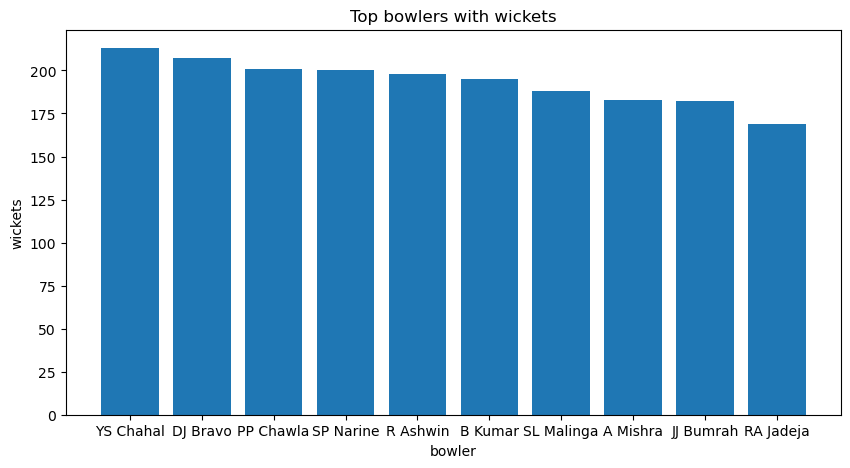

In [24]:
bowler=top_bowlers['bowler']
scores=top_bowlers['wickets']
fig = plt.figure(figsize = (10, 5))
plt.bar(bowler,scores)
plt.title('Top bowlers with wickets')
plt.xlabel('bowler')
plt.ylabel('wickets')